In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('de_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315795 entries, 0 to 315794
Data columns (total 10 columns):
CUSTOMER_ID         315795 non-null int64
ORDERS              315795 non-null int64
FIRST_ORDER_DATE    315795 non-null object
LAST_ORDER_DATE     315795 non-null object
TOTAL_CM2           315795 non-null object
NET_SALES           315795 non-null object
CM2_REL             315795 non-null object
ZTQ_ID              315795 non-null int64
START_DATE          315795 non-null object
EXPIRY_DATE         315795 non-null object
dtypes: int64(3), object(7)
memory usage: 24.1+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,9472224,23,2017-06-07,2018-05-08,225.7088,2935.4816,7.69,53,2017-06-07,2018-07-11
1,10492290,14,2017-06-07,2018-05-10,63.7081,604.9190,10.53,52,2016-10-02,2019-10-02
2,1372454,42,2017-06-08,2018-05-27,64.0626,1059.1346,6.05,51,2017-06-29,2018-07-31
3,15781488,9,2017-06-01,2018-05-07,99.3387,368.1303,26.98,54,2017-03-03,2020-03-03
4,15778383,4,2017-06-06,2018-03-28,44.8283,232.1857,19.31,56,2016-12-18,2017-12-18


In [11]:
tiers = [51, 52, 53, 54, 55, 56, 201, 202, 203, 204]

...........................................................TIER  51 ..........................................................


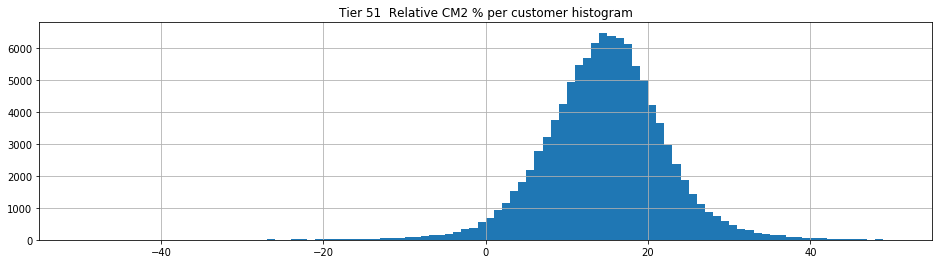

,CM2_REL
count,105296.00
mean,263.02
std,80602.51
min,-468.12
25%,10.25
50%,14.81
75%,19.18
max,26155000.00


CM2% threshold >= 5  is the percentile 8.44
CM2% threshold >= 7  is the percentile 13.17
CM2% threshold >=  11.29  is the percentile 30 allowing us to stay with the 70% of our sample


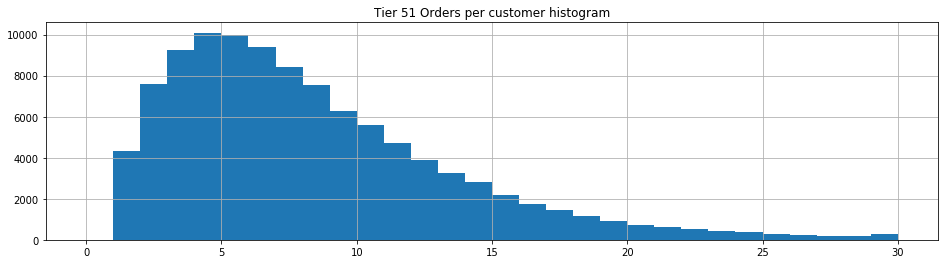

,ORDERS
count,105296.00
mean,8.12
std,6.11
min,1.00
25%,4.00
50%,7.00
75%,11.00
max,204.00


5.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  5.0  we keep eligible a  65.61  % from our customers
With CM2% threshold >= 7 and Orders >=  5.0  we keep eligible a  62.34  % from our customers
With CM2% threshold >=  11.29  and Orders >=  5.0  we keep eligible a  49.96  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


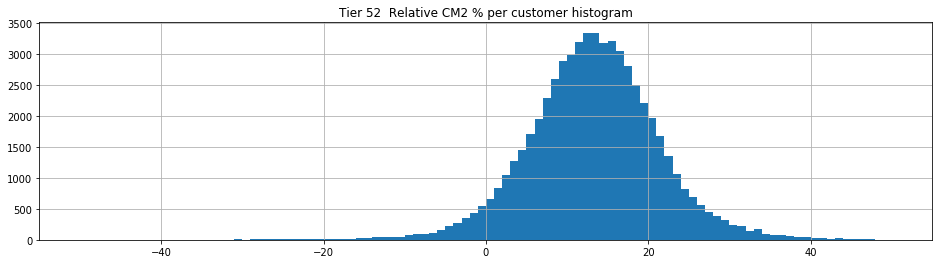

,CM2_REL
count,59991.00
mean,13.12
std,12.46
min,-2134.35
25%,8.38
50%,13.28
75%,18.13
max,73.50


CM2% threshold >= 5  is the percentile 13.48
CM2% threshold >= 7  is the percentile 19.57
CM2% threshold >=  9.47  is the percentile 30 allowing us to stay with the 70% of our sample


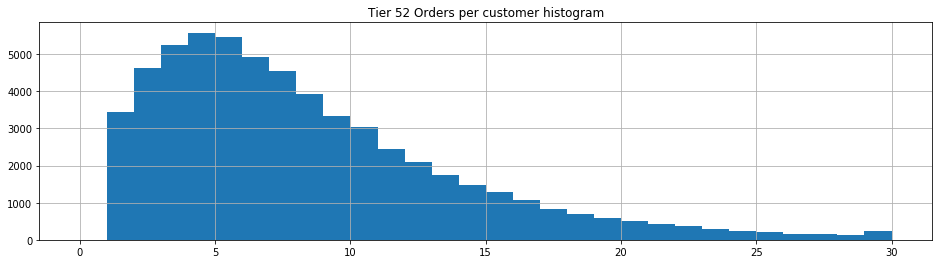

,ORDERS
count,59991.00
mean,8.35
std,7.34
min,1.00
25%,4.00
50%,7.00
75%,11.00
max,479.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  68.91  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  64.17  % from our customers
With CM2% threshold >=  9.47  and Orders >=  4.0  we keep eligible a  55.73  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


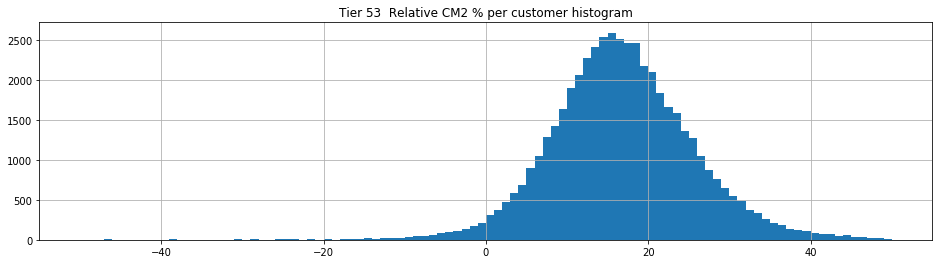

,CM2_REL
count,49894.00
mean,638.16
std,138837.05
min,-3444.90
25%,11.31
50%,16.46
75%,22.03
max,31012000.00


CM2% threshold >= 5  is the percentile 7.36
CM2% threshold >= 7  is the percentile 11.27
CM2% threshold >=  12.47  is the percentile 30 allowing us to stay with the 70% of our sample


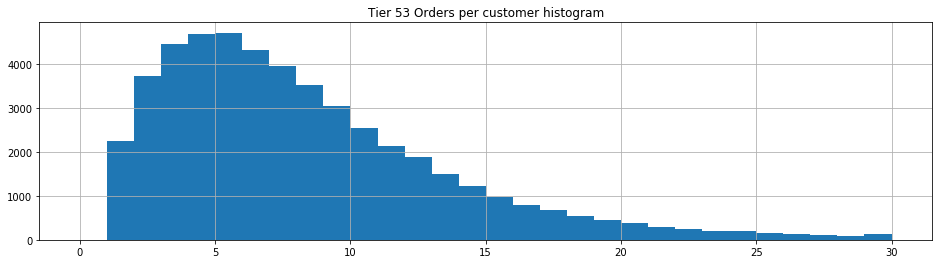

,ORDERS
count,49894.00
mean,8.10
std,6.27
min,1.00
25%,4.00
50%,7.00
75%,11.00
max,132.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  74.17  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  71.12  % from our customers
With CM2% threshold >=  12.47  and Orders >=  4.0  we keep eligible a  55.58  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


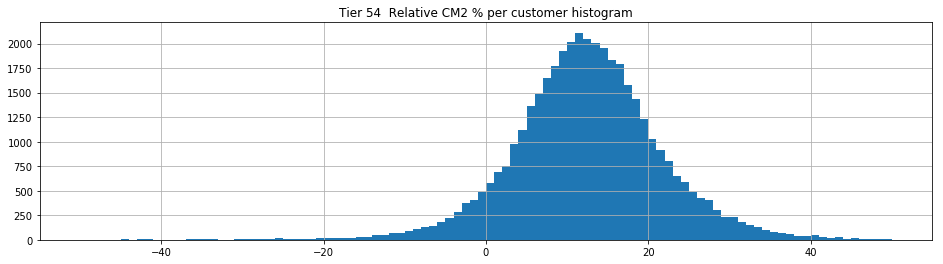

,CM2_REL
count,40474.00
mean,12.24
std,20.49
min,-3564.45
25%,7.09
50%,12.37
75%,17.81
max,76.26


CM2% threshold >= 5  is the percentile 17.6
CM2% threshold >= 7  is the percentile 24.67
CM2% threshold >=  8.3  is the percentile 30 allowing us to stay with the 70% of our sample


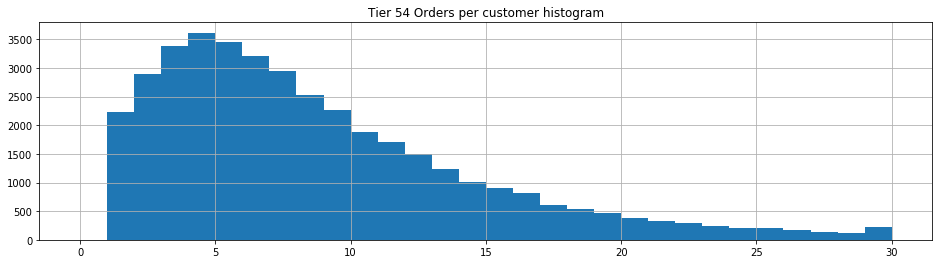

,ORDERS
count,40474.00
mean,9.57
std,57.25
min,1.00
25%,4.00
50%,7.00
75%,12.00
max,10168.00


5.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  5.0  we keep eligible a  59.3  % from our customers
With CM2% threshold >= 7 and Orders >=  5.0  we keep eligible a  54.16  % from our customers
With CM2% threshold >=  8.3  and Orders >=  5.0  we keep eligible a  50.15  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


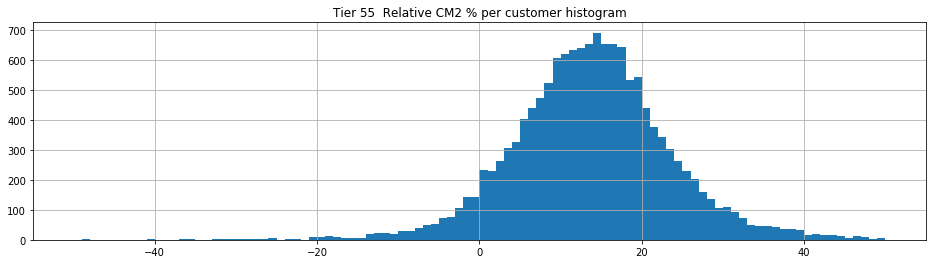

,CM2_REL
count,14239.00
mean,13.66
std,12.41
min,-669.56
25%,7.93
50%,13.77
75%,19.44
max,73.18


CM2% threshold >= 5  is the percentile 16.0
CM2% threshold >= 7  is the percentile 21.93
CM2% threshold >=  9.25  is the percentile 30 allowing us to stay with the 70% of our sample


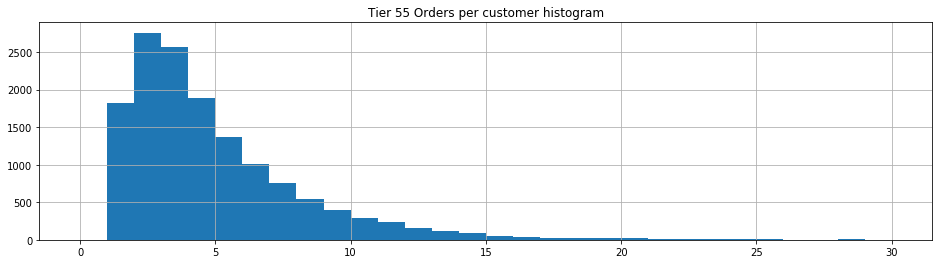

,ORDERS
count,14239.00
mean,4.46
std,3.43
min,1.00
25%,2.00
50%,3.00
75%,6.00
max,45.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  73.47  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  68.12  % from our customers
With CM2% threshold >=  9.25  and Orders >=  2.0  we keep eligible a  60.9  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


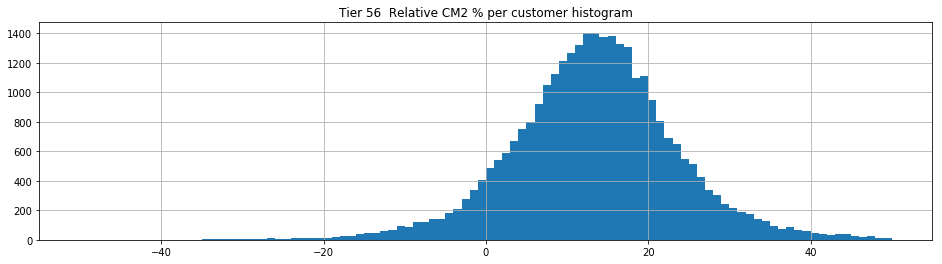

,CM2_REL
count,30791.00
mean,664.21
std,114247.85
min,-1746.10
25%,7.31
50%,13.45
75%,19.36
max,20047500.00


CM2% threshold >= 5  is the percentile 18.38
CM2% threshold >= 7  is the percentile 23.97
CM2% threshold >=  8.72  is the percentile 30 allowing us to stay with the 70% of our sample


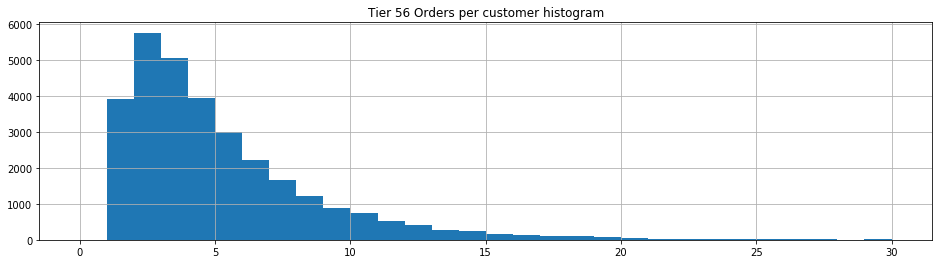

,ORDERS
count,30791.00
mean,5.54
std,69.80
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,8586.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  71.31  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  66.23  % from our customers
With CM2% threshold >=  8.72  and Orders >=  2.0  we keep eligible a  60.7  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  201 ..........................................................


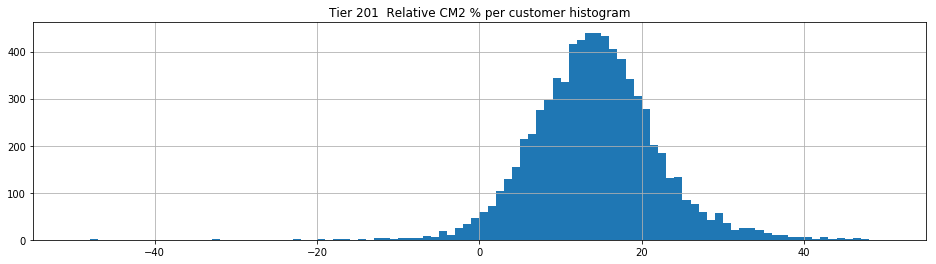

,CM2_REL
count,7426.00
mean,14.28
std,7.58
min,-47.03
25%,9.47
50%,14.11
75%,18.72
max,59.73


CM2% threshold >= 5  is the percentile 9.32
CM2% threshold >= 7  is the percentile 15.23
CM2% threshold >=  10.51  is the percentile 30 allowing us to stay with the 70% of our sample


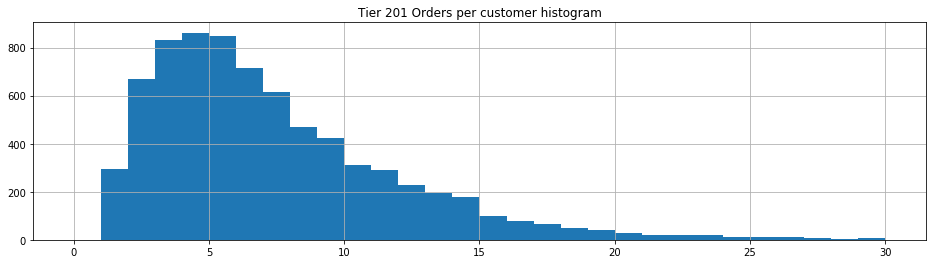

,ORDERS
count,7426.00
mean,6.96
std,4.85
min,1.00
25%,4.00
50%,6.00
75%,9.00
max,61.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  69.82  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  65.72  % from our customers
With CM2% threshold >=  10.51  and Orders >=  4.0  we keep eligible a  54.28  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  202 ..........................................................


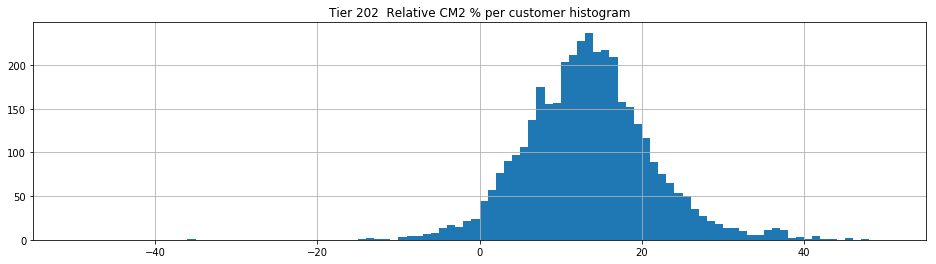

,CM2_REL
count,3835.00
mean,13.06
std,16.16
min,-832.80
25%,8.28
50%,13.26
75%,17.82
max,47.48


CM2% threshold >= 5  is the percentile 12.83
CM2% threshold >= 7  is the percentile 19.17
CM2% threshold >=  9.57  is the percentile 30 allowing us to stay with the 70% of our sample


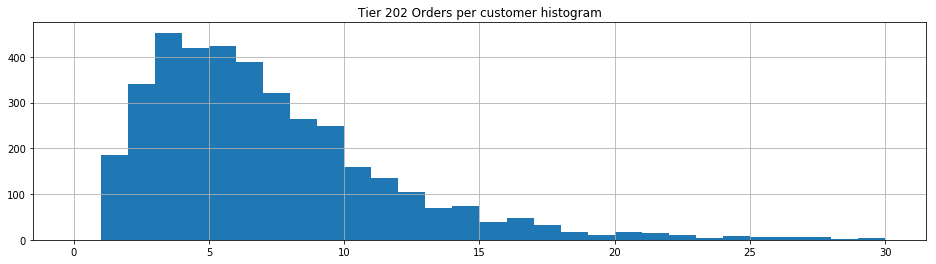

,ORDERS
count,3835.00
mean,6.85
std,5.07
min,1.00
25%,3.00
50%,6.00
75%,9.00
max,54.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  65.68  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  60.91  % from our customers
With CM2% threshold >=  9.57  and Orders >=  4.0  we keep eligible a  52.54  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  203 ..........................................................


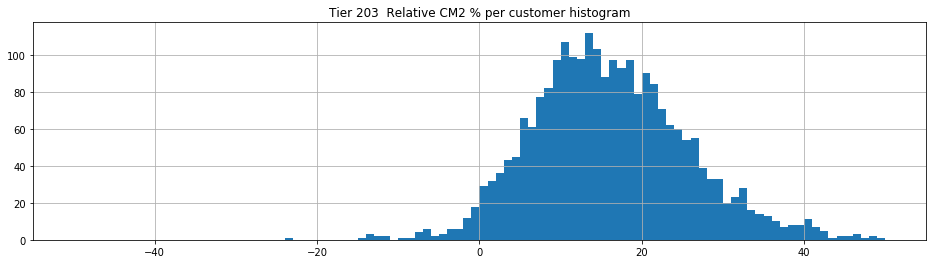

,CM2_REL
count,2375.00
mean,16.04
std,9.72
min,-65.13
25%,9.48
50%,15.36
75%,21.96
max,52.06


CM2% threshold >= 5  is the percentile 10.69
CM2% threshold >= 7  is the percentile 16.04
CM2% threshold >=  10.674  is the percentile 30 allowing us to stay with the 70% of our sample


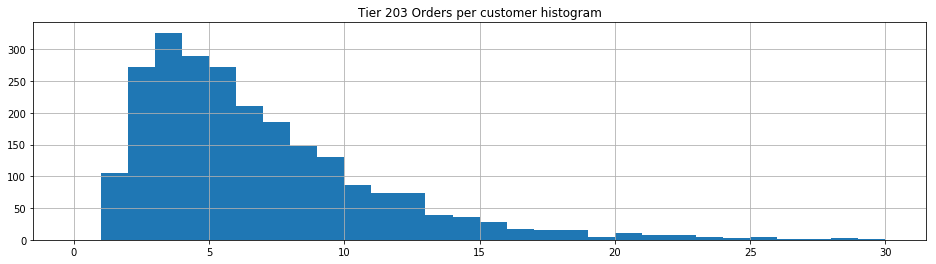

,ORDERS
count,2375.00
mean,6.35
std,4.51
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,44.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  63.83  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  59.58  % from our customers
With CM2% threshold >=  10.674  and Orders >=  4.0  we keep eligible a  49.85  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  204 ..........................................................


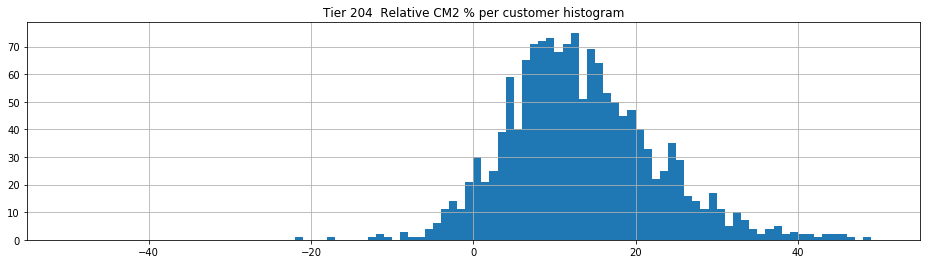

,CM2_REL
count,1474.00
mean,13.27
std,9.15
min,-21.57
25%,7.15
50%,12.37
75%,18.72
max,48.97


CM2% threshold >= 5  is the percentile 17.1
CM2% threshold >= 7  is the percentile 24.22
CM2% threshold >=  8.24  is the percentile 30 allowing us to stay with the 70% of our sample


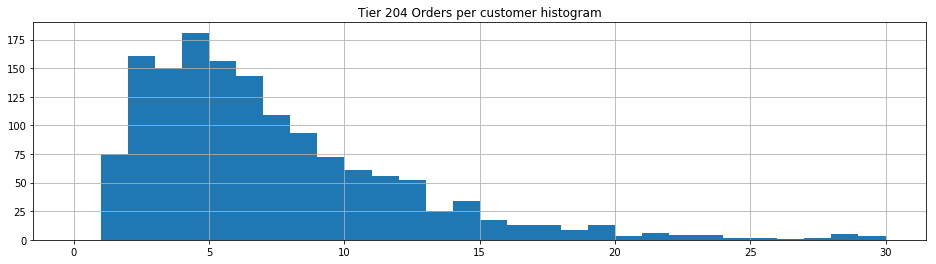

,ORDERS
count,1474.00
mean,6.98
std,5.73
min,1.00
25%,3.00
50%,6.00
75%,9.00
max,72.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  61.8  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  55.97  % from our customers
With CM2% threshold >=  8.24  and Orders >=  4.0  we keep eligible a  51.42  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,57271.0,52.386902,27.922992,10.474600,34.406117,45.765500,62.399079,1077.221580
52,30854.0,64.330188,38.193226,13.695800,39.705424,54.667425,77.906513,639.123700
53,26863.0,62.023614,36.412188,7.572040,40.617414,54.105263,74.265563,1447.061033
54,19916.0,77.926743,50.268712,0.000000,47.095488,65.735770,94.364506,1731.368763
55,6235.0,52.193116,27.716229,11.903950,33.928943,46.130167,62.805383,443.479925
56,13703.0,69.648107,85.745655,-0.000100,42.630448,58.107756,82.218047,7326.633529
201,4249.0,70.055232,31.616405,19.315043,49.955717,62.295975,81.063120,349.385075
202,2225.0,79.871796,36.709949,20.827575,55.307375,71.938940,94.292690,399.303343
203,1321.0,72.489111,33.566822,18.384475,51.108175,65.185843,85.823800,257.436400


In [15]:
data.columns

Index(['CUSTOMER_ID', 'ORDERS', 'FIRST_ORDER_DATE', 'LAST_ORDER_DATE',
       'TOTAL_CM2', 'NET_SALES', 'CM2_REL', 'ZTQ_ID', 'START_DATE',
       'EXPIRY_DATE', 'NET_BASKET_VALUE'],
      dtype='object')

In [16]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,57271.0,14.951104,7.246119,-196.33,10.6000,15.08,19.350,71.48
52,30854.0,13.472696,7.864040,-109.47,8.7000,13.51,18.290,55.88
53,26863.0,17.179579,9.599919,-405.88,11.7200,16.93,22.510,66.85
54,19916.0,12.649644,27.197306,-3564.45,7.4675,12.74,18.280,63.09
55,6235.0,13.180858,8.989940,-127.71,8.0350,13.32,18.330,52.86
56,13703.0,1475.245897,171258.497962,-1746.10,7.1900,12.75,18.040,20047500.00
201,4249.0,14.342219,7.148605,-19.02,9.6200,14.29,18.690,46.82
202,2225.0,13.178431,7.421215,-13.87,8.1700,13.07,17.650,45.72
203,1321.0,16.450053,9.569214,-65.13,10.0200,15.85,22.390,47.49


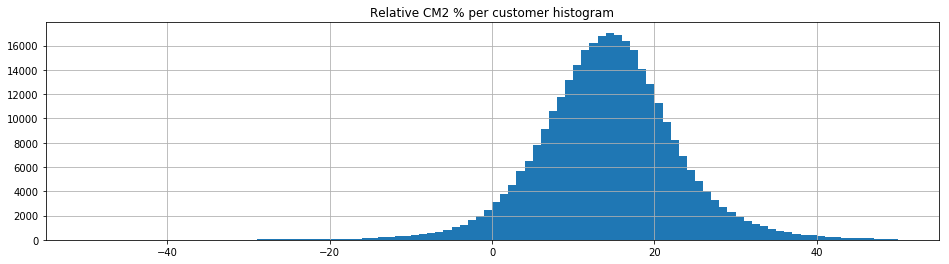

,CM2_REL
count,315795.00
mean,258.64
std,80525.28
min,-3564.45
25%,9.17
50%,14.29
75%,19.28
max,31012000.00


CM2% threshold >= 5  is the percentile 11.84
CM2% threshold >= 6  is the percentile 14.31
CM2% threshold >= 7  is the percentile 17.2
CM2% threshold >= 8  is the percentile 20.55
CM2% threshold >= 9  is the percentile 24.29
CM2% threshold >= 10  is the percentile 28.47
CM2% threshold >=  10.34  is the percentile 30 allowing us to stay with the 70% of our sample


In [17]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

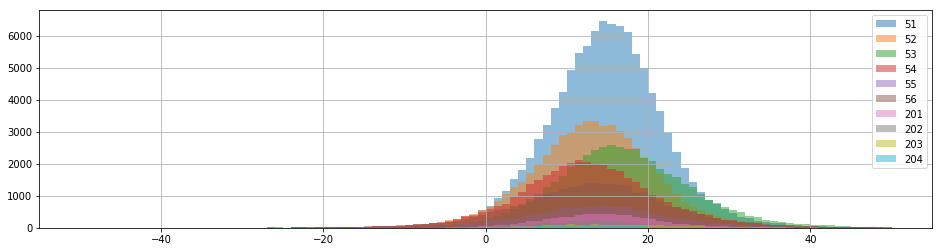

In [18]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56, 201, 202, 203, 204])
plt.show()   